In [1]:
import sys
import os
import random
import numpy as np
import copy

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from src.MAB import MAB
from src.REEXPLORE import REEXPLORE
from src.algorithms import Explore, Greedy, ETC, Epgreedy, UCB, Thompson_sampling
from src.utility import run_algorithm, plot_regret_single, plot_regret_double, random_argmax, plot_regret_grid

In [2]:
seed = 0
random.seed(seed) 
np.random.seed(seed)

In [3]:
main_mab = MAB(T=2000, K=10, T_resampled=500, mu_low=0, mu_high=10, std=1, portion=1)
print(main_mab.get_mu_list())
print(main_mab.get_mu_list2())

[5.48813504 7.15189366 6.02763376 5.44883183 4.23654799 6.45894113
 4.37587211 8.91773001 9.63662761 3.83441519]
[8.70087258 1.4035078  6.48171872 3.6824154  9.57155159 3.3739616
 6.7887953  5.2047748  8.00910752 4.73608045]


In [4]:
R = 100

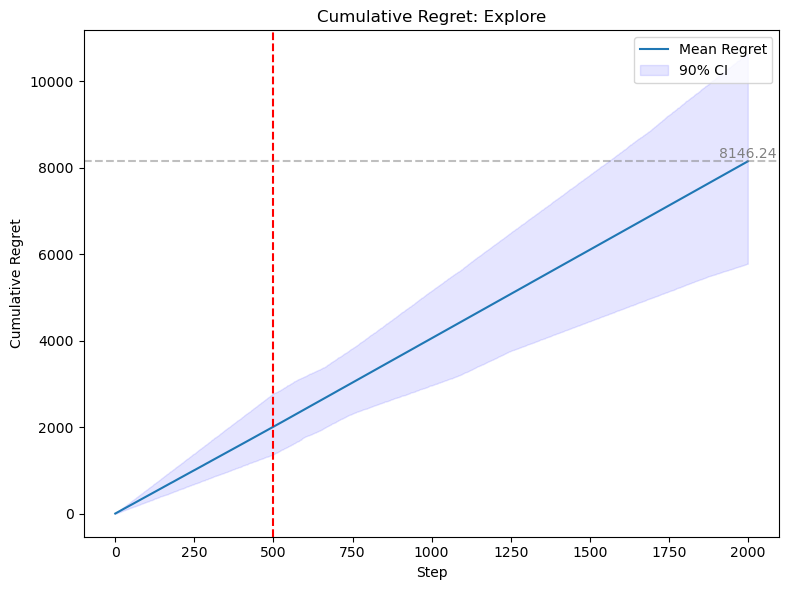

mean regret: 8146.24
5% regret: 5779.54
95% regret: 10644.12


In [5]:
mab = copy.deepcopy(main_mab)
alg = Explore(mab)
regretls_explore = run_algorithm(mab, alg, R=R)
plot_regret_single(mab, regretls_explore, 'Explore')

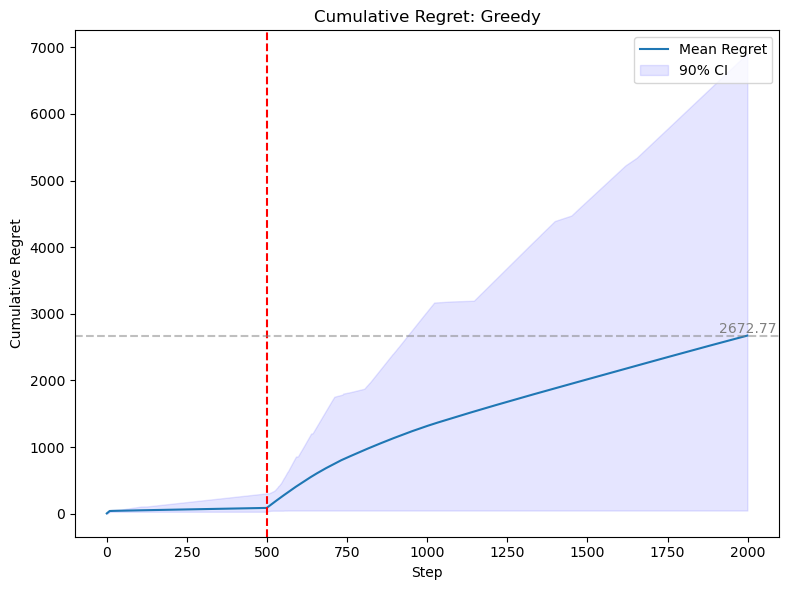

mean regret: 2672.77
5% regret: 47.54
95% regret: 6908.09


In [6]:
mab = copy.deepcopy(main_mab)
alg = Greedy(mab)
regretls_greedy = run_algorithm(mab, alg, R=R)
plot_regret_single(mab, regretls_greedy, 'Greedy')

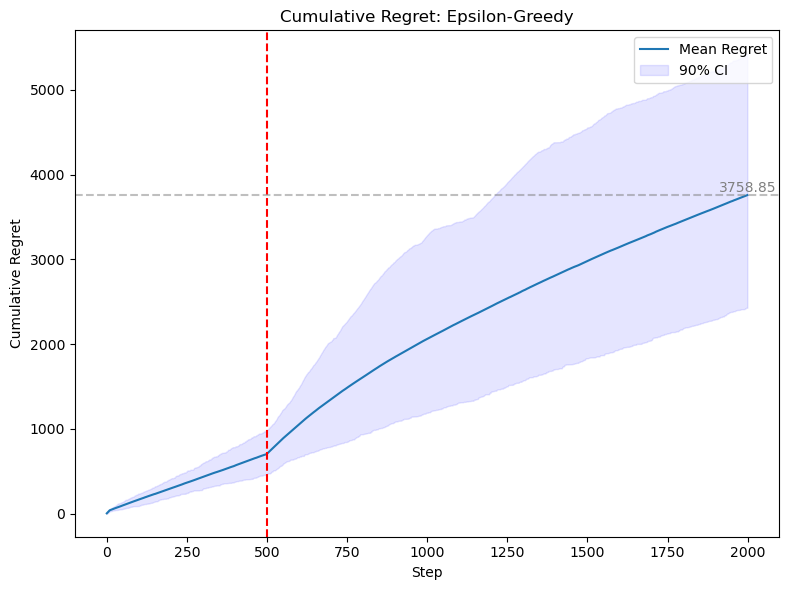

mean regret: 3758.85
5% regret: 2430.00
95% regret: 5431.36


In [7]:
mab = copy.deepcopy(main_mab)
alg = Epgreedy(mab, delta = 0.2)
regretls_epsgreedy = run_algorithm(mab, alg, R=R)
plot_regret_single(mab, regretls_epsgreedy, 'Epsilon-Greedy')

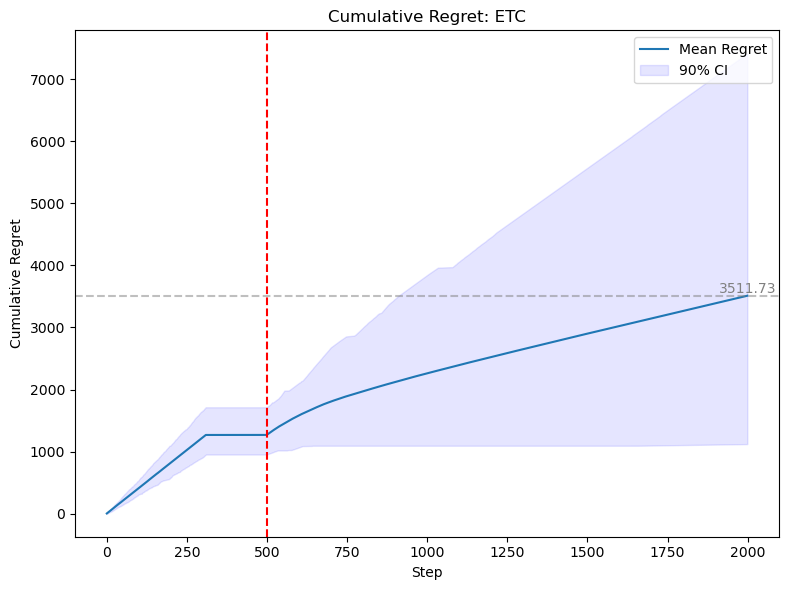

mean regret: 3511.73
5% regret: 1121.47
95% regret: 7416.76


In [8]:
mab = copy.deepcopy(main_mab)
alg = ETC(mab, Ne = 30)
regretls_ETC = run_algorithm(mab, alg, R=R)
plot_regret_single(mab, regretls_ETC, 'ETC')

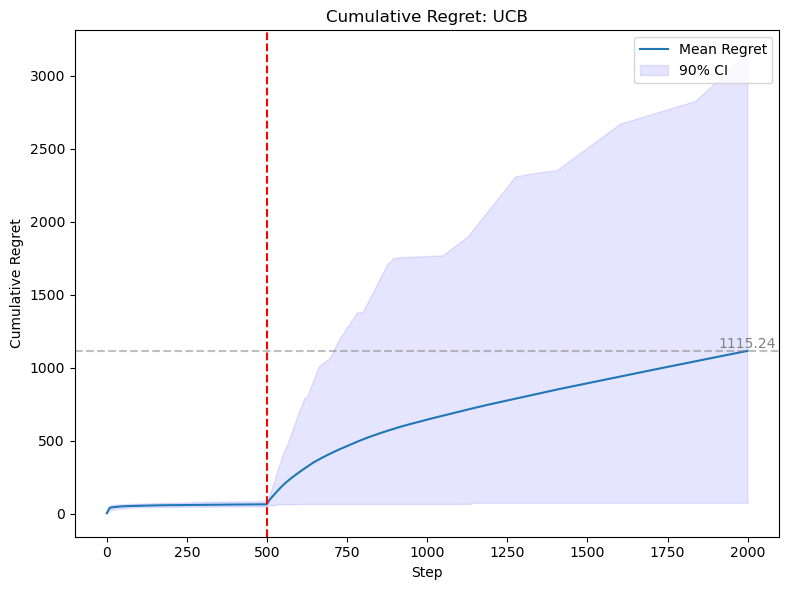

mean regret: 1115.24
5% regret: 75.25
95% regret: 3153.40


In [9]:
mab = copy.deepcopy(main_mab)
alg = UCB(mab, delta = 0.2)
regretls_ucb = run_algorithm(mab, alg, R=R)
plot_regret_single(mab, regretls_ucb, 'UCB')

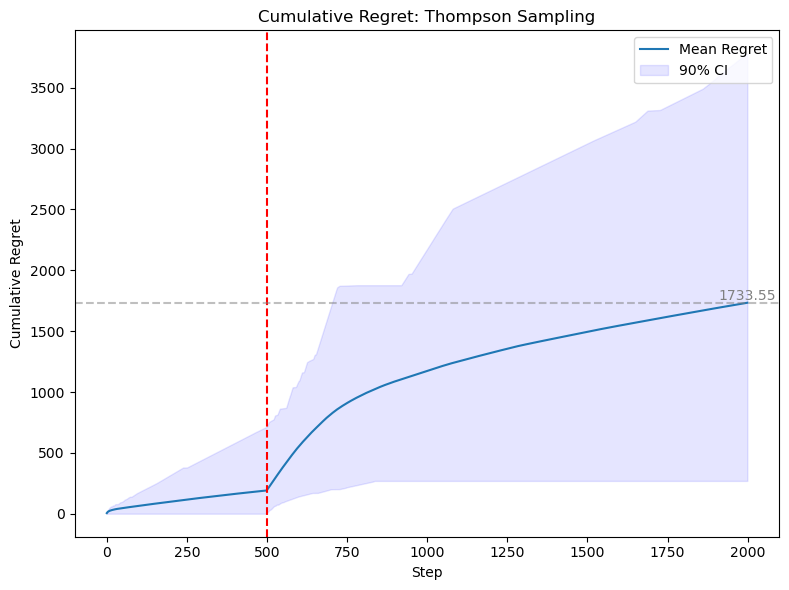

mean regret: 1733.55
5% regret: 269.37
95% regret: 3783.01


In [10]:
mab = copy.deepcopy(main_mab)
alg = Thompson_sampling(mab)
regretls_thompson = run_algorithm(mab, alg, R=R)
plot_regret_single(mab, regretls_thompson, 'Thompson Sampling')

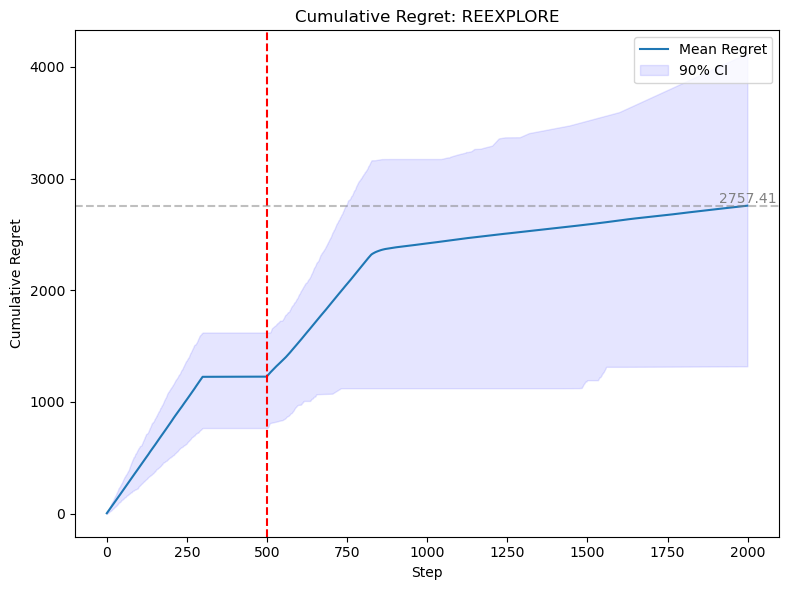

mean regret: 2757.41
5% regret: 1319.35
95% regret: 4120.94


In [11]:
mab = copy.deepcopy(main_mab)
alg = REEXPLORE(mab, T_explore = 300, T_reexplore = 300, M = 100, epsilon=0.001, cooldown=500)
regretls_REEXPLORE = run_algorithm(mab, alg, R=R)
plot_regret_single(mab, regretls_REEXPLORE, 'REEXPLORE')

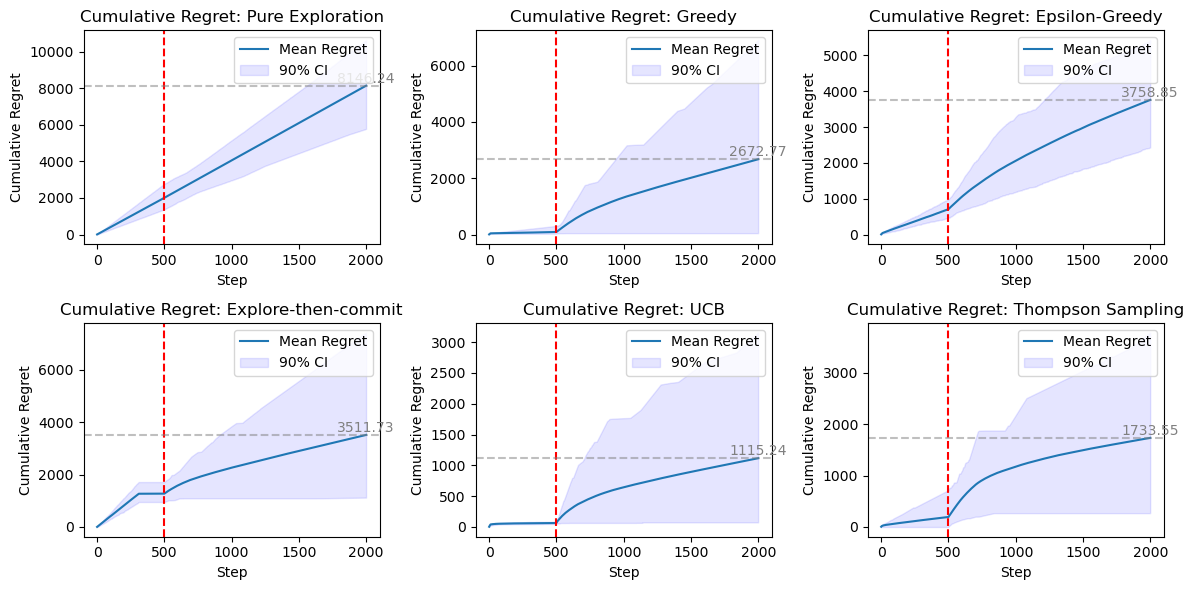

In [12]:
plot_regret_grid(mab, [regretls_explore,
                       regretls_greedy,
                       regretls_epsgreedy,
                       regretls_ETC,
                       regretls_ucb,
                       regretls_thompson
                      ], ['Pure Exploration','Greedy','Epsilon-Greedy','Explore-then-commit','UCB','Thompson Sampling'])

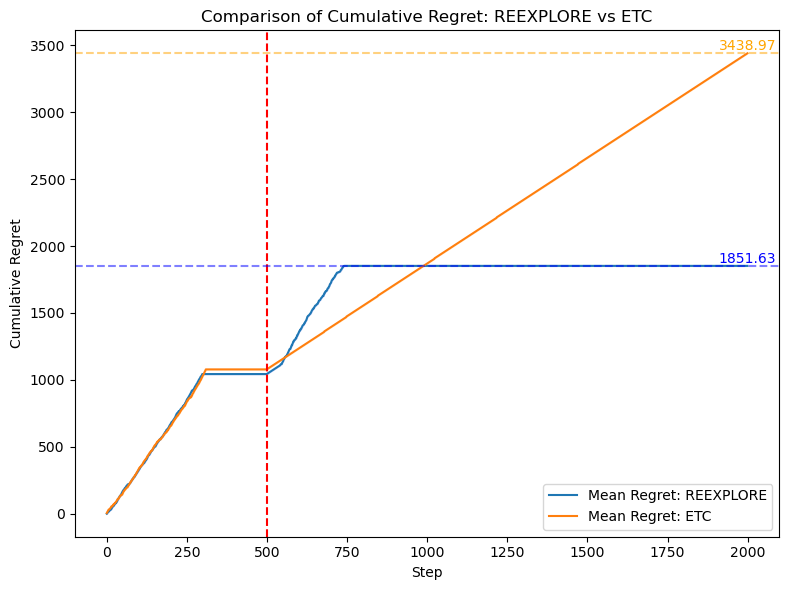

In [13]:
R = 1
mab = copy.deepcopy(main_mab)
alg1 = REEXPLORE(mab, T_explore = 300, T_reexplore = 200, M = 100, epsilon=0.001, cooldown=500)
regretls1 = run_algorithm(mab, alg1, R=R)

mab= copy.deepcopy(main_mab)
alg2 = ETC(mab, Ne = 30)
regretls2 = run_algorithm(mab, alg2, R=R)
plot_regret_double(mab, regretls1, regretls2, 'REEXPLORE','ETC')

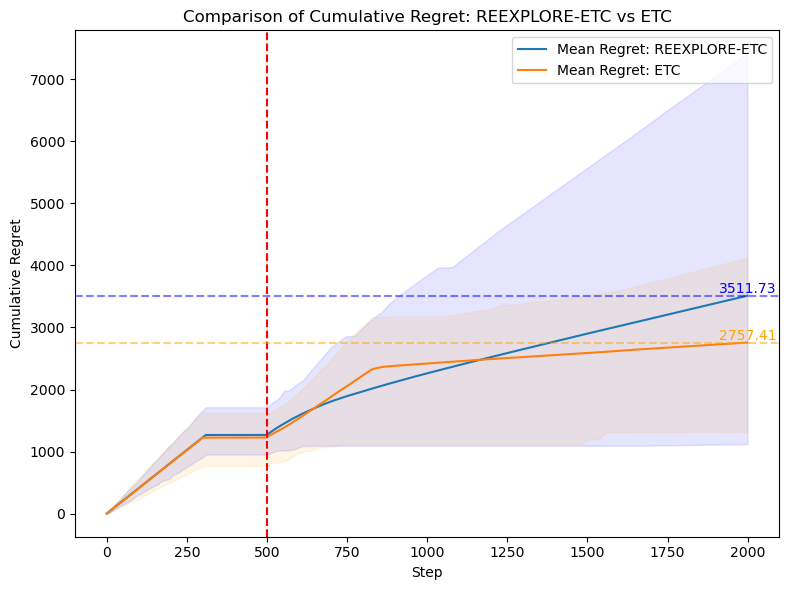

In [14]:
mab = copy.deepcopy(main_mab)
plot_regret_double(mab, regretls_ETC, regretls_REEXPLORE, 'REEXPLORE-ETC','ETC')